In [1]:
import pandas as pd

In [5]:
euribor = pd.read_csv(
    "https://datahub.io/core/euribor/r/euribor-12m-monthly.csv",
    parse_dates=["date"],
    index_col="date",
    usecols=["date", "rate"]
)

In [8]:
sp500 = pd.read_csv(
    "https://datahub.io/core/s-and-p-500/r/data.csv",
    index_col="Date",
    parse_dates=["Date"],
)
exchange_rates = pd.read_csv(
    "https://datahub.io/core/us-euro-foreign-exchange-rate/r/monthly.csv",
    parse_dates=["Date"],
)
iris = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
)
titanic = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
)

In [19]:
sp500.iloc[:5]

sp500.loc["1871-01-01":"1871-12-01"]

sp500["SP500"]
sp500.sort_index(ascending=False)
sp500.sample(5)

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1922-12-01,8.78,0.51,0.69,16.9,4.35,129.80,7.54,10.20,7.96
2000-01-01,1425.59,16.71,49.10,168.8,6.66,2109.97,24.74,72.67,43.77
1930-09-01,20.78,0.98,1.13,16.6,3.32,312.75,14.71,17.01,21.07
1986-08-01,245.00,8.19,14.80,109.7,7.17,557.97,18.64,33.71,13.89
1950-11-01,19.83,1.42,2.80,24.7,2.53,200.58,14.40,28.32,11.54


In [20]:
euribor[euribor.rate < 0]

euribor_list = [-0.1, 1.2, -0.3]

,rate
date,
2016-03-01,-0.026
2016-04-01,-0.002
2016-05-02,-0.012
2016-06-01,-0.018
2016-07-01,-0.052
2016-08-01,-0.048
2016-09-01,-0.051
2016-10-03,-0.064
2016-11-01,-0.069


In [25]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
titanic_new = titanic.loc[:, ["pclass", "sex", "age", "alive"]]
titanic_new.columns = ["passenger_class", "sex", "age", "survived"]
titanic_new["survived"] = titanic_new["survived"].replace(
    {"yes": True, "no": False}
)

In [28]:
titanic_new

,passenger_class,sex,age,survived
0,3,male,22.0,False
1,1,female,38.0,True
2,3,female,26.0,True
3,1,female,35.0,True
4,3,male,35.0,False
...,...,...,...,...
886,2,male,27.0,False
887,1,female,19.0,True
888,3,female,NaN,False
889,1,male,26.0,True


In [34]:
import numpy as np

values_np = sp500["SP500"].to_numpy()
diffs = values_np[1:] - values_np[:-1]
diffs = np.concatenate([np.array([float('nan')]), diffs])

sp500["Diff"] = diffs
sp500["Gain"] = sp500["Diff"] / sp500["SP500"]
sp500

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,Diff,Gain
Date,,,,,,,,,,,
1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN,NaN,NaN
1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN,0.06,0.013333
1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN,0.11,0.023861
1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN,0.13,0.027426
1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN,0.12,0.024691
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09,70.73,0.026547
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31,125.46,0.044971
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12,-84.64,-0.031288


<AxesSubplot:>

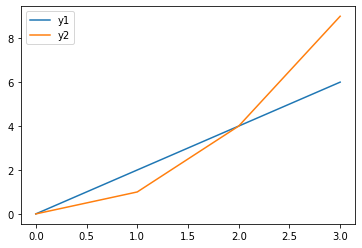

In [35]:
import numpy as np
import pandas as pd

x = np.array([0, 1, 2, 3])

data = pd.DataFrame({
    "y1": x*2,
    "y2": x**2
})

data.plot.line()

<AxesSubplot:xlabel='Date'>

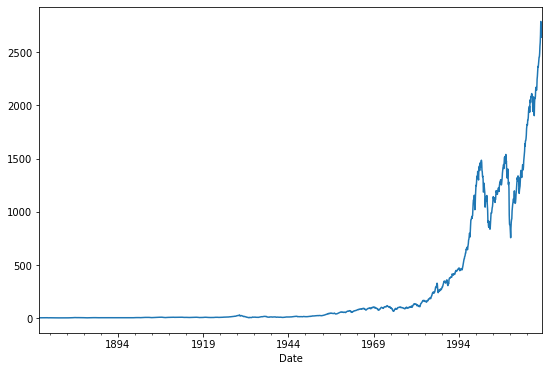

In [36]:
sp500["SP500"].plot.line(figsize=(9, 6))

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

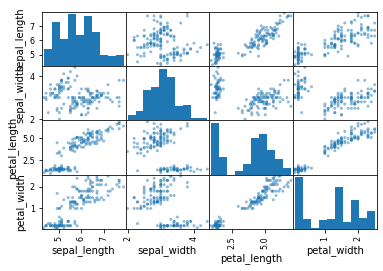

In [37]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris)